In [1]:
import pandas as pd
import os

We first focus on the daily usage of Chinese-related racial slurs on Twitter from 2020/1 to 2020/12

## Read in all the csv files

Read in 12 csv files, organize them into 12 dictioanries corresponding to 12 months. Each monthly dictionary has keys corresponding to date and value corresponding to that date's DataFrame. Each date's DataFrame contains all scraped tweets.

In [2]:
folder_1_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-01-slur'
folder_2_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-02-slur'
folder_3_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-03-slur'
folder_4_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-04-slur'
folder_5_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-05-slur'
folder_6_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-06-slur'
folder_7_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-07-slur'
folder_8_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-08-slur'
folder_9_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-09-slur'
folder_10_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-10-slur'
folder_11_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-11-slur'
folder_12_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-12-slur'

In [3]:
files_1 = os.listdir(folder_1_path)
files_2 = os.listdir(folder_2_path)
files_3 = os.listdir(folder_3_path)
files_4 = os.listdir(folder_4_path)
files_5 = os.listdir(folder_5_path)
files_6 = os.listdir(folder_6_path)
files_7 = os.listdir(folder_7_path)
files_8 = os.listdir(folder_8_path)
files_9 = os.listdir(folder_9_path)
files_10 = os.listdir(folder_10_path)
files_11 = os.listdir(folder_11_path)
files_12 = os.listdir(folder_12_path)

In [4]:
def create_df(files, folder_path):
    '''
    Helper function to create monthly dictionary, each dictionary has key of date and value of DataFrame
    '''
    dfs = {}
    for file in files:
        df = pd.read_csv(os.path.join(folder_path, file))
        dfs[file[:-4]] = df
    return dfs

Each dfs is a dictionary (representing a month), key is the date and value is the DataFrame correspoonding to each day in that month

In [5]:
dfs_1 = create_df(files_1, folder_1_path)
dfs_2 = create_df(files_2, folder_2_path)
dfs_3 = create_df(files_3, folder_3_path)
dfs_4 = create_df(files_4, folder_4_path)
dfs_5 = create_df(files_5, folder_5_path)
dfs_6 = create_df(files_6, folder_6_path)
dfs_7 = create_df(files_7, folder_7_path)
dfs_8 = create_df(files_8, folder_8_path)
dfs_9 = create_df(files_9, folder_9_path)
dfs_10 = create_df(files_10, folder_10_path)
dfs_11 = create_df(files_11, folder_11_path)
dfs_12 = create_df(files_12, folder_12_path)

## Calculate Twitter dataset's size by day and by month

In [6]:
def day_count(dfs):
    ''' 
    Helper function to calculate the number of tweets in each day 
    in a given month DataFrame
    '''
    monthly_count = []
    for key, values in dfs.items():
        date = pd.to_datetime(key).strftime('%m-%d')
        count = values.shape[0]
        monthly_count.append((date, count))
    sorted_monthly_count = sorted(monthly_count, key=lambda x: x[0])
    return sorted_monthly_count

Each count variable is a list of tuples representing the number of scraped tweets in that month.
Each tuple in the list has 2 elements: date and number of tweets on that day

In [7]:
jan_count = day_count(dfs_1)
feb_count = day_count(dfs_2)
mar_count = day_count(dfs_3)
apr_count = day_count(dfs_4)
may_count = day_count(dfs_5)
jun_count = day_count(dfs_6)
jul_count = day_count(dfs_7)
aug_count = day_count(dfs_8)
sep_count = day_count(dfs_9)
oct_count = day_count(dfs_10)
nov_count = day_count(dfs_11)
dec_count = day_count(dfs_12)

In [8]:
# In the scraping process, I missed the twitter data on 12-31, so we assign the data of 12-30 to 12-31
last_count = dec_count[-1][1]
new_tuple = ('12-31', last_count)
dec_count.append(new_tuple)
dec_count

[('12-01', 915),
 ('12-02', 862),
 ('12-03', 746),
 ('12-04', 799),
 ('12-05', 798),
 ('12-06', 911),
 ('12-07', 1001),
 ('12-08', 1001),
 ('12-09', 1001),
 ('12-10', 1001),
 ('12-11', 1001),
 ('12-12', 984),
 ('12-13', 1001),
 ('12-14', 1001),
 ('12-15', 1001),
 ('12-16', 1001),
 ('12-17', 1001),
 ('12-18', 1001),
 ('12-19', 1001),
 ('12-20', 1001),
 ('12-21', 1001),
 ('12-22', 1001),
 ('12-23', 932),
 ('12-24', 972),
 ('12-25', 716),
 ('12-26', 718),
 ('12-27', 1001),
 ('12-28', 1001),
 ('12-29', 1001),
 ('12-30', 1001),
 ('12-31', 1001)]

Calculate the total number of scraped tweets in each month

In [9]:
monthly_count_lst = []
for counts in [jan_count, feb_count, mar_count, apr_count, may_count, jun_count, jul_count, aug_count, sep_count, oct_count, nov_count, dec_count]:
    monthly_count = 0
    for (_, count) in counts:
        monthly_count += count
    monthly_count_lst.append(monthly_count)

In [10]:
print('Number of total scraped tweets each month: ', monthly_count_lst)
print('Total counts of scraped tweets = ', sum(monthly_count_lst))

Number of total scraped tweets each month:  [22526, 20509, 23579, 27315, 27042, 26638, 27602, 24554, 23676, 27015, 25161, 29373]
Total counts of scraped tweets =  304990


## Manual clean data based on keywords

When examning the csv file, I notice a relatively large amount of tweets including the keyword "chyna" refer to the famous model "Blac Chyna," which means I need to investigate the impact of this public figure on my dataset 

In [ ]:
# def calculate_blac_chyna_count(dfs):
#     ''' 
#     Helper function to calculate the number of tweets including the keywords blac chyna
#     '''

#     blac_chyna_count = 0
#     for _, df in dfs.items():
#         text_lower = df['Text'].str.lower()
#         username_lower = df['Username'].str.lower()
#         blac_chyna_count += (text_lower.str.contains('blac chyna')).sum()
#         blac_chyna_count += (username_lower.str.contains('blac chyna')).sum()

#     return blac_chyna_count

In [ ]:
# jan_blac = calculate_blac_chyna_count(dfs_1)
# feb_blac = calculate_blac_chyna_count(dfs_2)
# mar_blac = calculate_blac_chyna_count(dfs_3)
# apr_blac = calculate_blac_chyna_count(dfs_4)
# may_blac = calculate_blac_chyna_count(dfs_5)
# jun_blac = calculate_blac_chyna_count(dfs_6)
# jul_blac = calculate_blac_chyna_count(dfs_7)
# aug_blac = calculate_blac_chyna_count(dfs_8)
# sep_blac = calculate_blac_chyna_count(dfs_9)
# oct_blac = calculate_blac_chyna_count(dfs_10)
# nov_blac = calculate_blac_chyna_count(dfs_11)
# dec_blac = calculate_blac_chyna_count(dfs_12)

# blac_counts = jan_blac, feb_blac, mar_blac, apr_blac, may_blac, jun_blac, jul_blac, aug_blac, sep_blac, oct_blac, nov_blac, dec_blac
# print('Number of tweets containing blac chyna in each month = ', blac_counts)
# print('Total number of tweets containing blac chyna = ', sum(blac_counts))

In [ ]:
# minus_chyna_lst = []
# for x, y in zip(monthly_count_lst, blac_counts): 
#     minus_chyna = x - y
#     minus_chyna_lst.append(minus_chyna)
# print('Number of tweets excluding blac chyna in each month = ', minus_chyna_lst)
# print('Total number of tweets excluding blac chyna = ', sum(minus_chyna_lst))

<i>After manually go through my scraped Twitter dataset, I found that the racial slur keyword "chyna" can be very misleading as many tweets including this word use it as a last name or first name with neutral meaning, so remove this keyword compeletely.</i>

In [11]:
for dfs in [dfs_1, dfs_2, dfs_3, dfs_4, dfs_5, dfs_6, dfs_7, dfs_8, dfs_9, dfs_10, dfs_11, dfs_12]:
    for key, df in dfs.items():
        drop_index = df[df['Text'].str.contains('chyna') | df['Text'].str.contains('Chyna') | df['Username'].str.contains('chyna') | df['Username'].str.contains('Chyna')].index
        df.drop(index=drop_index, inplace=True)
        df.reset_index(drop=True, inplace=True)

In [12]:
new_jan_count = day_count(dfs_1)
new_feb_count = day_count(dfs_2)
new_mar_count = day_count(dfs_3)
new_apr_count = day_count(dfs_4)
new_may_count = day_count(dfs_5)
new_jun_count = day_count(dfs_6)
new_jul_count = day_count(dfs_7)
new_aug_count = day_count(dfs_8)
new_sep_count = day_count(dfs_9)
new_oct_count = day_count(dfs_10)
new_nov_count = day_count(dfs_11)
new_dec_count = day_count(dfs_12)

In [13]:
# When I scrape Twitter data, the last day's data was missing so now I fill in 12-31 with tweets from the previous
last_count = new_dec_count[-1][1]
new_tuple = ('12-31', last_count)
new_dec_count.append(new_tuple)
new_dec_count

[('12-01', 355),
 ('12-02', 409),
 ('12-03', 296),
 ('12-04', 320),
 ('12-05', 248),
 ('12-06', 421),
 ('12-07', 485),
 ('12-08', 305),
 ('12-09', 333),
 ('12-10', 353),
 ('12-11', 379),
 ('12-12', 336),
 ('12-13', 425),
 ('12-14', 356),
 ('12-15', 407),
 ('12-16', 405),
 ('12-17', 417),
 ('12-18', 414),
 ('12-19', 385),
 ('12-20', 351),
 ('12-21', 300),
 ('12-22', 307),
 ('12-23', 341),
 ('12-24', 417),
 ('12-25', 306),
 ('12-26', 302),
 ('12-27', 390),
 ('12-28', 359),
 ('12-29', 371),
 ('12-30', 344),
 ('12-31', 344)]

In [14]:
new_monthly_count_lst = []
for counts in [new_jan_count, new_feb_count, new_mar_count, new_apr_count, new_may_count, new_jun_count, 
               new_jul_count, new_aug_count, new_sep_count, new_oct_count, new_nov_count, new_dec_count]:
    monthly_count = 0
    for (_, count) in counts:
        monthly_count += count
    new_monthly_count_lst.append(monthly_count)
print('New monthly counts of tweets = ', new_monthly_count_lst)
print('New total counts of tweets', sum(new_monthly_count_lst))

New monthly counts of tweets =  [8841, 6895, 10940, 10911, 12322, 13820, 11521, 10630, 10021, 11461, 11448, 11181]
New total counts of tweets 129991


## Visualize Cleaned Twitter Dataset

In [15]:
import matplotlib.pyplot as plt

In [16]:

def plot_daily(month_count, month):
    ''' 
    Helper function to plot counts of each month's scraped tweets
    '''
    plt.figure(figsize=(18, 5))
    days = [t[0] for t in month_count]
    counts = [t[1] for t in month_count]
    plt.plot(days, counts)
    plt.title(month+' Daily Tweet Counts')
    plt.xlabel("Date")
    plt.ylabel("Tweet Count")
    plt.show()

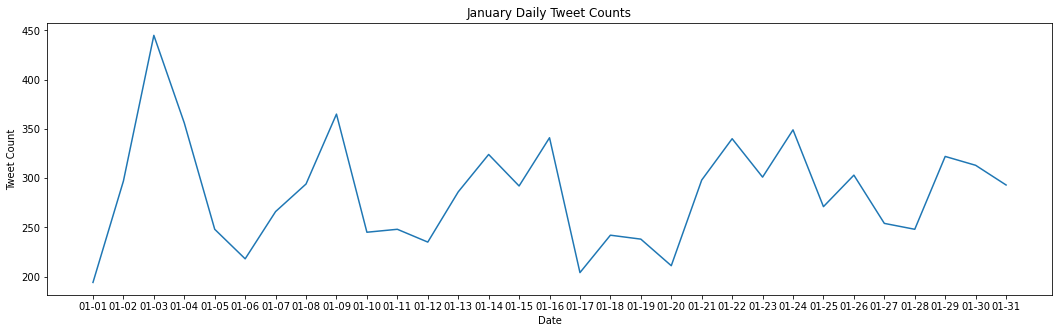

In [17]:
plot_daily(new_jan_count, 'January')

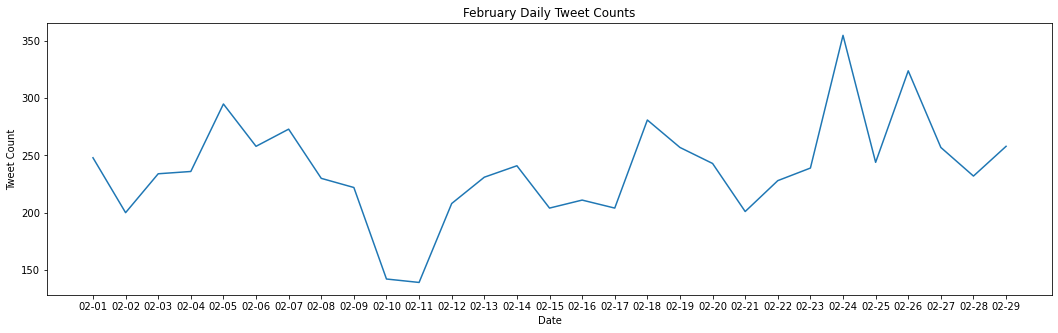

In [18]:
plot_daily(new_feb_count, 'February')

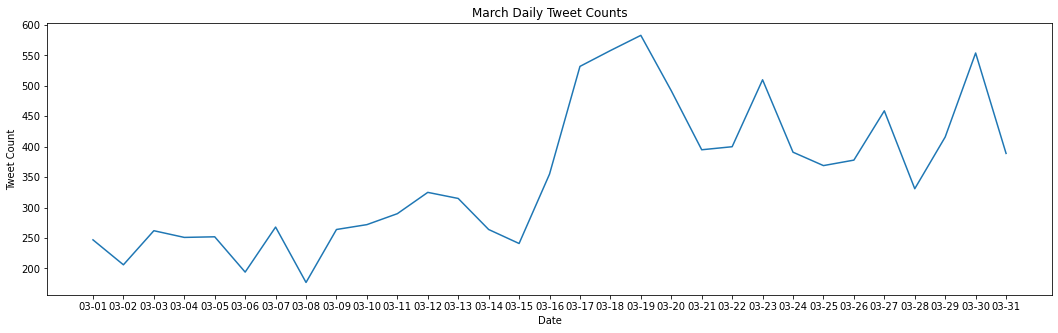

In [19]:
plot_daily(new_mar_count, 'March')

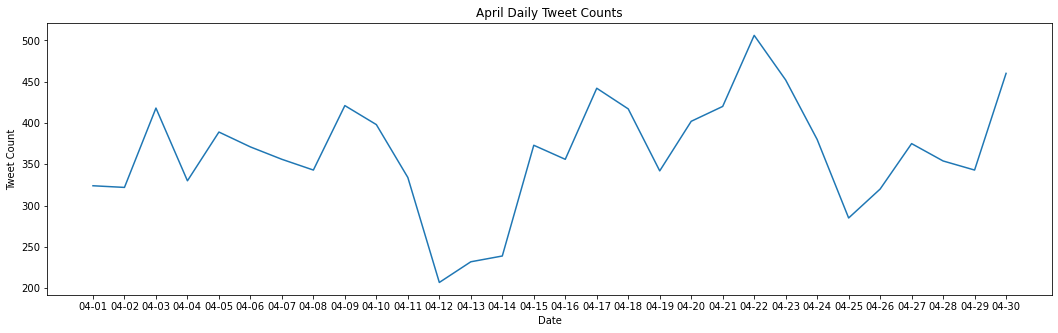

In [20]:
plot_daily(new_apr_count, 'April')

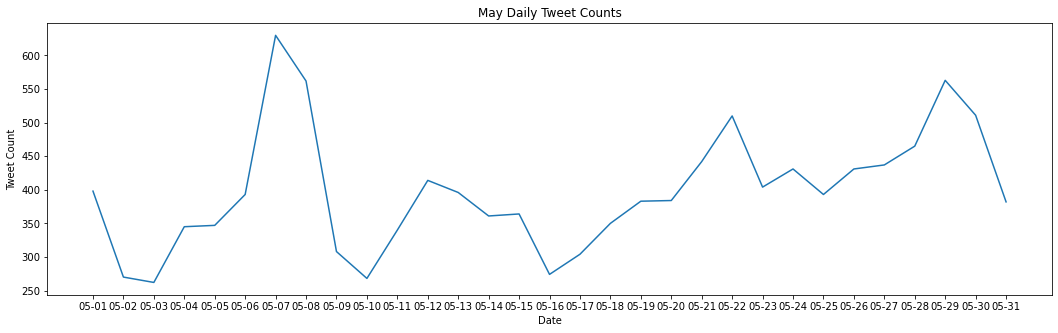

In [21]:
plot_daily(new_may_count, 'May')

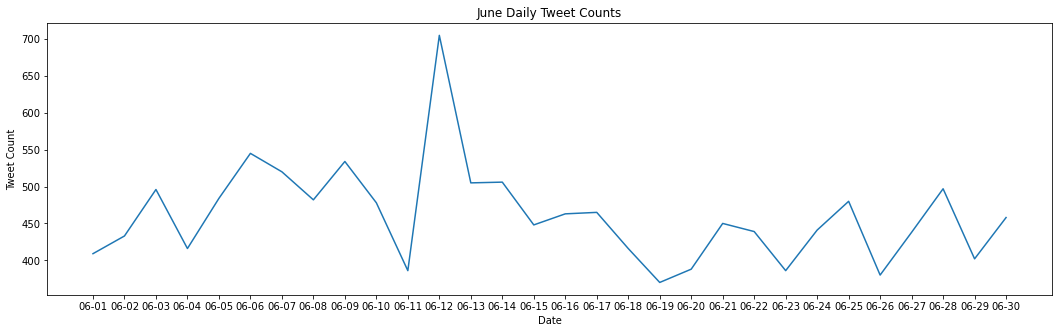

In [23]:
plot_daily(new_jun_count, 'June')

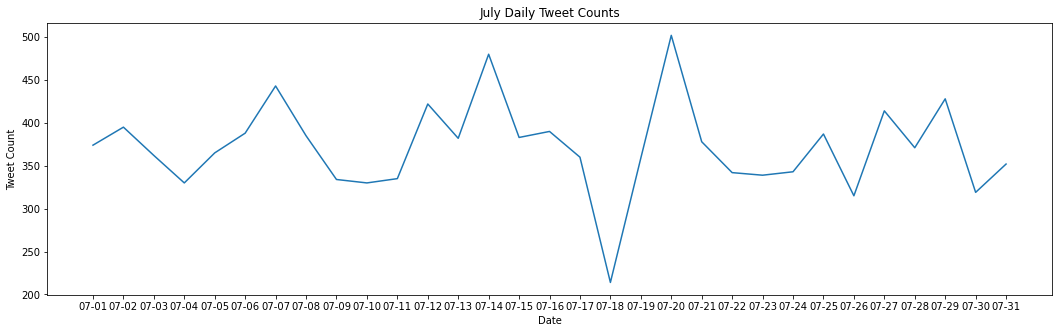

In [24]:
plot_daily(new_jul_count, 'July')

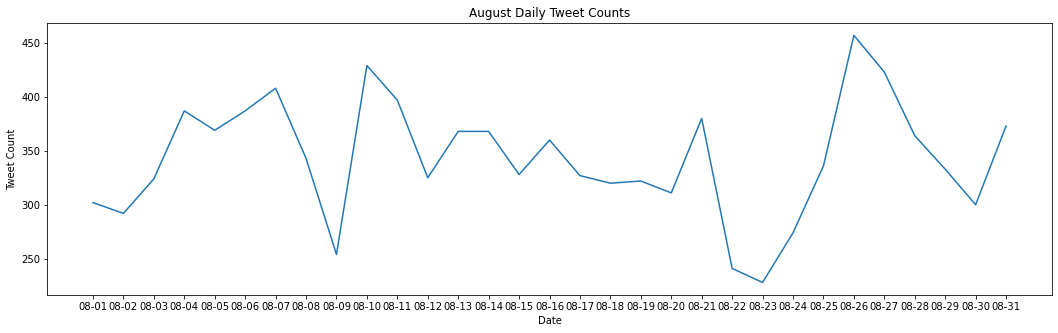

In [25]:
plot_daily(new_aug_count, 'August')

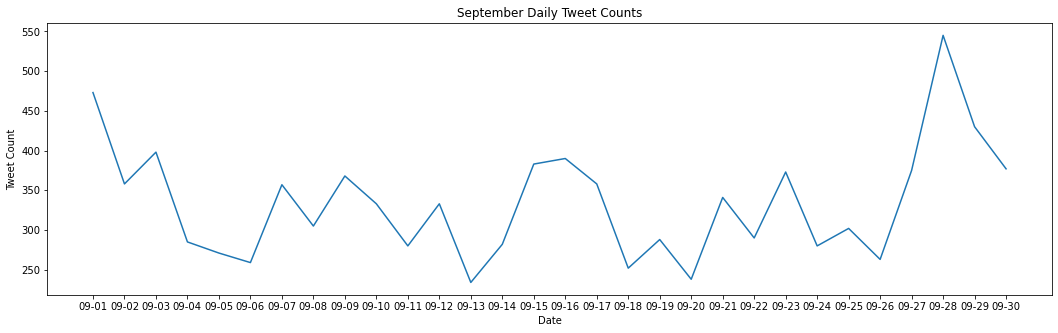

In [26]:
plot_daily(new_sep_count, 'September')

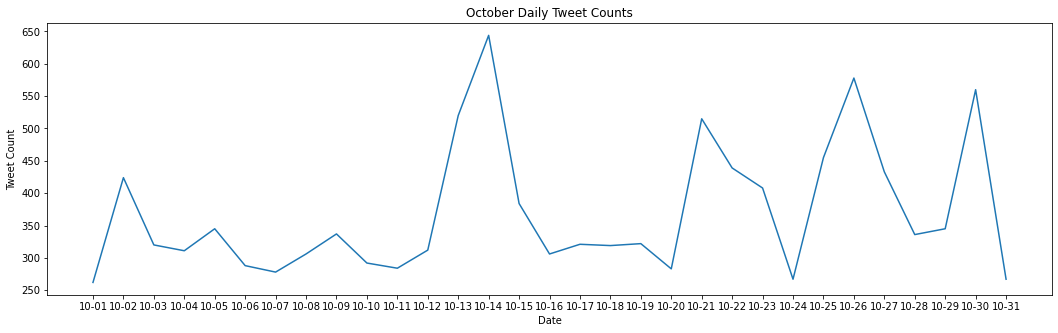

In [27]:
plot_daily(new_oct_count, 'October')

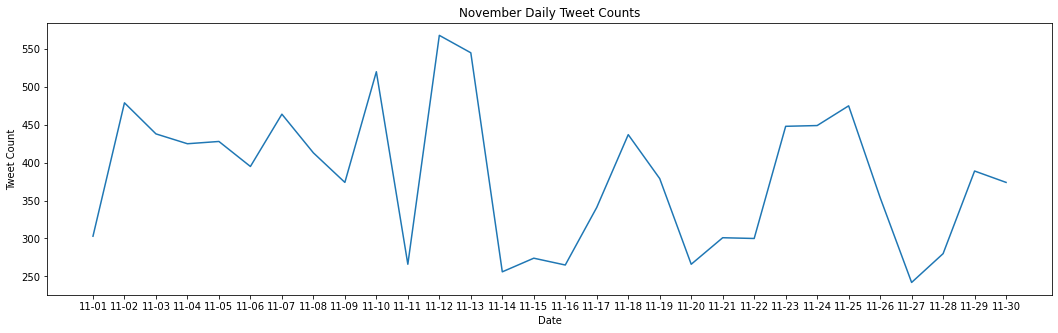

In [28]:
plot_daily(new_nov_count, 'November')

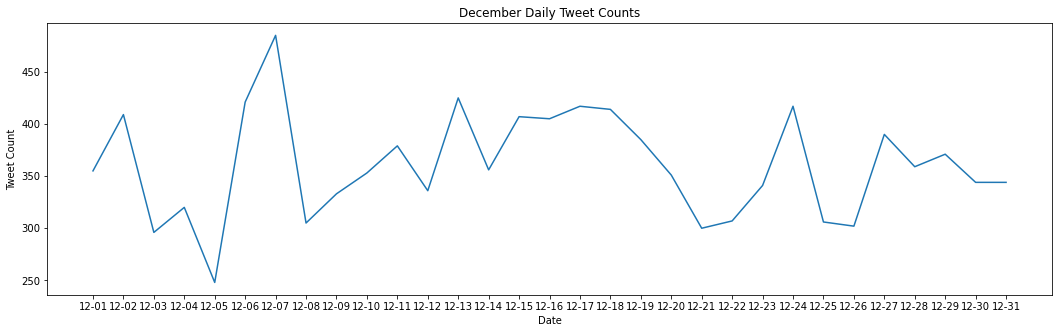

In [29]:
plot_daily(new_dec_count, 'December')

### Visualize daily tweet counts throughout the year of 2020

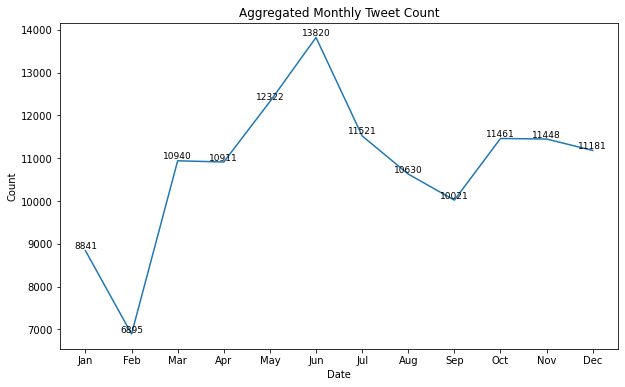

In [22]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10, 6))
plt.plot(months, new_monthly_count_lst)
plt.title("Aggregated Monthly Tweet Count")
plt.xlabel("Date")
plt.ylabel("Count")
for i in range(len(months)):
    plt.text(months[i], new_monthly_count_lst[i], new_monthly_count_lst[i], ha='center', va='bottom', fontsize=9)
plt.show()

In [23]:
all_counts = new_jan_count + new_feb_count + new_mar_count + new_apr_count + new_may_count + new_jun_count \
        + new_jul_count + new_aug_count + new_sep_count + new_oct_count + new_nov_count + new_dec_count

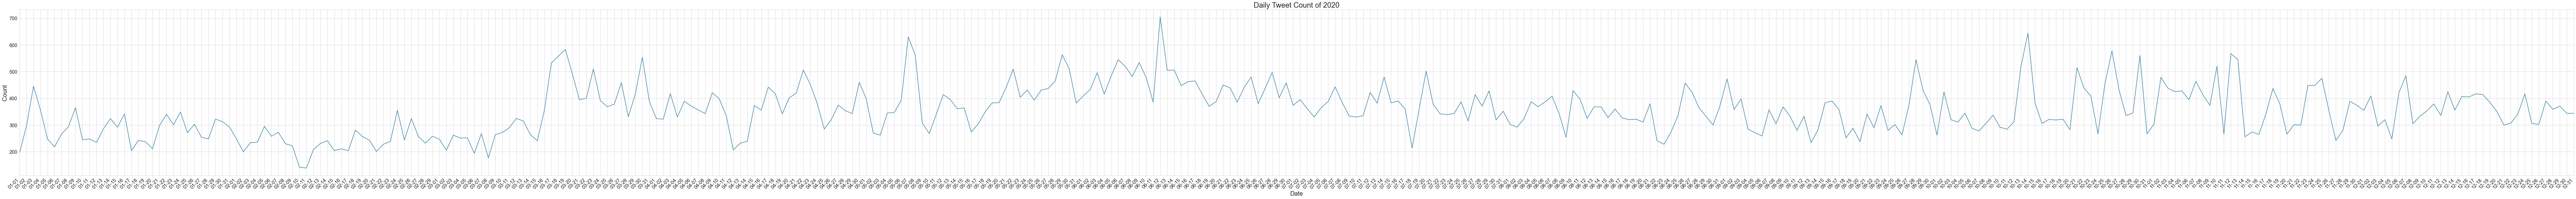

In [24]:
import seaborn as sns
all_dates = [t[0] for t in all_counts]
all_tweet_counts = [t[1] for t in all_counts]

plt.figure(figsize=(150, 10))
sns.set_style('whitegrid')
sns.lineplot(x=all_dates, y=all_tweet_counts)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Daily Tweet Count of 2020', fontsize=24)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(min(all_dates), max(all_dates))
plt.show()

## Further clean data based on sentiment analysis

Although I collected tweets based on racial slurs used and recommended by other researchers in their studies,
it is possible that the keywords have a different meaning and hence the tweets I collected are not in fact Sinophobic. To address this issue, I will conduct a series of sentiment analysis to find the negative sentiment tweets

In [25]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/itsyuzhou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
def preprocess_tweet(tweet):
    ''' 
    Helper function to preprocess a given tweet for future sentiment analysis
    '''
    tweet = tweet.lower() # Convert to lowercase
    tweet = re.sub(r'http\S+', '', tweet) # Remove URLs
    tweet = re.sub(r'[^\w\s]', '', tweet) # Remove punctuation
    tweet = ' '.join([word for word in tweet.split() if word not in stop_words])
    tweet = lemmatizer.lemmatize(tweet)
    tweet = stemmer.stem(tweet)
    return tweet

In [27]:
# Clean and preprocess all data frames corresponding to each month of tweet, already preprocessed Jan in the above section
for dfs in [dfs_1, dfs_2, dfs_3, dfs_4, dfs_5, dfs_6, dfs_7, dfs_8, dfs_9, dfs_10, dfs_11, dfs_12]:
    for df in dfs.values():
        df['Preprocessed Text'] = df["Text"].apply(preprocess_tweet)

In [28]:
dfs_1['2020-01-01']['Preprocessed Text'] # Example of preprocessed texts

0                lilnasx msgwentaylor naw space gook god
1      chinaman good time eating good time famous chi...
2                               chinaman_123 10 tokenpay
3      deespeak zee5premium mohituraina sidpmalhotra ...
4                       deaf people know farts make nois
                             ...                        
189    dont like new year across neighbours dressing ...
190    still remember first time someone called chink...
191    yall idea people really jokes back high school...
192    secpompeo corruption needs exported lets also ...
193                 bitibities27 thank youhappy new year
Name: Preprocessed Text, Length: 194, dtype: object

In [29]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def sentiment_score(df):
    ''' 
    Helper function to calculate the polarity score as measurement of tweet sentiment for each month data frame.
    Change the original DataFrame by including sentiment information/columns
    '''
    scores = df['Preprocessed Text'].apply(sia.polarity_scores)
    df['Negative Scores'] = scores.apply(lambda x: x['neg'])
    df['Compound Scores'] = scores.apply(lambda x: x['compound'])
    
    df['Sentiment'] = ''
    df.loc[df['Compound Scores'] > 0, 'Sentiment'] = 'Positive'
    df.loc[df['Compound Scores'] == 0, 'Sentiment'] = 'Neutral'
    df.loc[df['Compound Scores'] < 0, 'Sentiment'] = 'Negative'
    
    return df

Randomly choose 10 negative tweets, 10 neutral tweets, and 10 positive tweets manually labeled by me. Apply NLTK sentiment classification on them to see the classification performance

In [38]:
print(sia.polarity_scores('Wouldn’t want some gook screaming on my face either'))
print(sia.polarity_scores('@RyanBacardi I’m sick leave me alone chink'))
print(sia.polarity_scores('Chink eyes , when Im high !'))
print(sia.polarity_scores('Damn im stinkin like a chink rn 😂😂'))
print(sia.polarity_scores('@IrisSensei_ @Rushherss @aghastlou @Royal_CTV you’re also a chinaman, lowest in society'))
print(sia.polarity_scores('Fuck you chink!'))
print(sia.polarity_scores("When I say Chinks are sneaky I don't mean it in a racist way... I am just pointing out how they are. Howard knows I love Chink food! Case Closed! https://t.co/ye2q2YfXyI'"))
print(sia.polarity_scores('@Iosetheshorts GET RID OF THE CHINK'))
print(sia.polarity_scores('Miss my gf Chink 💛🖕🏾🎗'))
print(sia.polarity_scores('I think about the times I was called chink, or gook, or people pulled their eyelids back (has still happened into adulthood), or assumed I couldn’t speak English, or commented on how well I did speak English, or spat at me (happened as a kid).'))


{'neg': 0.239, 'neu': 0.642, 'pos': 0.119, 'compound': -0.3182}
{'neg': 0.619, 'neu': 0.381, 'pos': 0.0, 'compound': -0.6705}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.265, 'neu': 0.49, 'pos': 0.245, 'compound': -0.0516}
{'neg': 0.224, 'neu': 0.776, 'pos': 0.0, 'compound': -0.3818}
{'neg': 0.655, 'neu': 0.345, 'pos': 0.0, 'compound': -0.5848}
{'neg': 0.192, 'neu': 0.683, 'pos': 0.125, 'compound': -0.3147}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.1531}
{'neg': 0.0, 'neu': 0.949, 'pos': 0.051, 'compound': 0.2732}


In [39]:
print(sia.polarity_scores('@MOTHERKIMCHI I fully agree with you and all but I don’t think chink had to be used at all 🥺I’ve just had family been called the same and I just think all these racial slurs just gotta get out of our vocabulary, also ur very pretty and cool pls I don’t mean any hate at all'))
print(sia.polarity_scores('Would you date a chink — Again, why would race ever have an impact on dating? But let’s also not use that word https://t.co/h12BU4kOFA'))
print(sia.polarity_scores('	@rudepundit The chink in the armor.'))
print(sia.polarity_scores('@melonfIavor clearly chink but of what sort'))
print(sia.polarity_scores('Chink'))
print(sia.polarity_scores("I shouldn't have to explain why Chink Virus' is so hurtful, but I will anyway https://t.co/7NWJ6J9dNq"))
print(sia.polarity_scores("I’m a chink. https://t.co/5Mj2WfrBEE"))
print(sia.polarity_scores('@Dannie59397624 Are you Chinaman?🧐'))
print(sia.polarity_scores('got more styles than a chinaman'))
print(sia.polarity_scores('@LawofTD He wants to say gook so bad...'))

{'neg': 0.08, 'neu': 0.74, 'pos': 0.18, 'compound': 0.6577}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.2144}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.171, 'neu': 0.829, 'pos': 0.0, 'compound': -0.3986}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [40]:
print(sia.polarity_scores('Really love how Trump says "CHYNA!"'))
print(sia.polarity_scores('@tallgirl420 LITERALLY. thank you love you too chink'))
print(sia.polarity_scores('@lenalovebot Lol chink'))
print(sia.polarity_scores('@NXNW_Chink Thank you'))
print(sia.polarity_scores('@ReytMardyBum Why is Chink insulting?, I presume you think it is ? 😂😂😂😂😂'))
print(sia.polarity_scores('@NW_StayDet Russier. Chink. I’m learning.'))
print(sia.polarity_scores('@nnckmlc Miss you chink!! Ingat sad ha 🤗'))
print(sia.polarity_scores('@KoochieStruggle chink lover'))
print(sia.polarity_scores('I must look like a gook.'))
print(sia.polarity_scores('Oh,yeah Chinaman GO GO!'))

{'neg': 0.0, 'neu': 0.511, 'pos': 0.489, 'compound': 0.6989}
{'neg': 0.0, 'neu': 0.472, 'pos': 0.528, 'compound': 0.7717}
{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.4215}
{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.3612}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.452, 'neu': 0.342, 'pos': 0.205, 'compound': -0.4374}
{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.5859}
{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [30]:
for dfs in [dfs_1, dfs_2, dfs_3, dfs_4, dfs_5, dfs_6, dfs_7, dfs_8, dfs_9, dfs_10, dfs_11, dfs_12]:
    for df in dfs.values():
        df = sentiment_score(df)

In [42]:
dfs_3['2020-03-13'] # Example to take a look

,Datetime,Tweet Id,Username,Text,Preprocessed Text,Negative Scores,Compound Scores,Sentiment
0,2020-03-13 23:59:48+00:00,1238615779475668995,lightskin_chink,"Got Laj, My daughter &amp; my son name all tat...",got laj daughter amp son name tatted fin,0.000,0.0000,Neutral
1,2020-03-13 23:59:12+00:00,1238615628921155589,lightskin_chink,I really hate people😑,really hate peopl,0.666,-0.6115,Negative
2,2020-03-13 23:58:47+00:00,1238615523849637889,hxmosuperior,@xueclan Do you call him a chink too? Aw that'...,xueclan call chink aw thats sweet,0.000,0.4588,Positive
3,2020-03-13 23:57:03+00:00,1238615087826550787,hxmosuperior,@xueclan Hey at least it's better than telling...,xueclan hey least better telling chinese peopl...,0.220,-0.5448,Negative
4,2020-03-13 23:56:15+00:00,1238614885182984192,OliverDionte,@aye_yo_chink 🤣🤣they said it’s the flu hit wit...,aye_yo_chink said flu hit fentanyl,0.394,-0.3818,Negative
...,...,...,...,...,...,...,...,...
310,2020-03-13 00:02:54+00:00,1238254172253958145,PauHuck47,Congress livid over lags in coronavirus testin...,congress livid lags coronavirus testing 330 mi...,0.322,-0.8591,Negative
311,2020-03-13 00:02:44+00:00,1238254127035146249,samheagney,@Glenevo It did occur to me that not having an...,glenevo occur said ag commodities sell chink plan,0.000,0.0000,Neutral
312,2020-03-13 00:02:17+00:00,1238254014074150913,ChaosBahamut,@JGreenblattADL Now if people started calling ...,jgreenblattadl people started calling chink vi...,0.000,0.2732,Positive
313,2020-03-13 00:02:03+00:00,1238253955655835648,BiggWoo_TF,I hate when black pigs do the most trying to b...,hate black pigs trying big hog group clown ass...,0.474,-0.8020,Negative


In [31]:
def sentiment_tweet_count(sentiment):
    tweets_by_month = []
    for dfs in [dfs_1, dfs_2, dfs_3, dfs_4, dfs_5, dfs_6, dfs_7, dfs_8, dfs_9, dfs_10, dfs_11, dfs_12]:
        count = 0
        for df in dfs.values():
            count += len(df.loc[df['Sentiment']==sentiment])
        tweets_by_month.append(count)
    return tweets_by_month

In [32]:
neg_tweets_by_month = sentiment_tweet_count('Negative')
print(neg_tweets_by_month)
print('Total count of negative tweets', sum(neg_tweets_by_month))

[2609, 1961, 3510, 3219, 3503, 4037, 3390, 2823, 2967, 2961, 2902, 2977]
Total count of negative tweets 36859


In [33]:
neu_tweets_by_month = sentiment_tweet_count('Neutral')
print(neu_tweets_by_month)
print('Total count of neutral tweets', sum(neu_tweets_by_month))

[3105, 2427, 3730, 4069, 4401, 4608, 4098, 3960, 3562, 4430, 4500, 4033]
Total count of neutral tweets 46923


In [34]:
pos_tweets_by_month = sentiment_tweet_count('Positive')
print(pos_tweets_by_month)
print('Total count of positive tweets', sum(pos_tweets_by_month))

[3127, 2507, 3700, 3623, 4418, 5175, 4033, 3847, 3492, 4070, 4046, 3827]
Total count of positive tweets 45865


## Visualize negatively, neutrally, and positively classified Twitter dataset

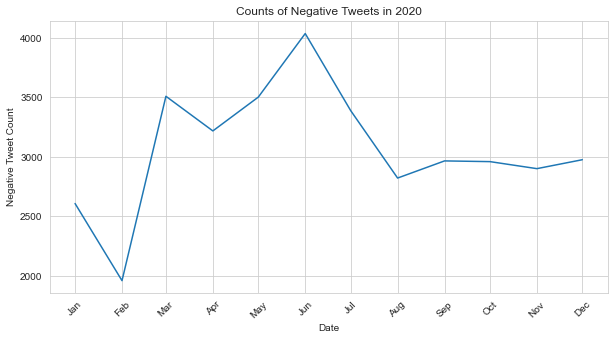

In [35]:
from datetime import datetime
x = [datetime.strptime(f'2020-{i+1}-01', '%Y-%m-%d') for i in range(12)]

plt.figure(figsize=(10, 5))
plt.plot(x, neg_tweets_by_month)
plt.title('Counts of Negative Tweets in 2020')
plt.xlabel('Date')
plt.ylabel('Negative Tweet Count')
plt.xticks(x, [dt.strftime('%b') for dt in x], rotation=45)
plt.show()

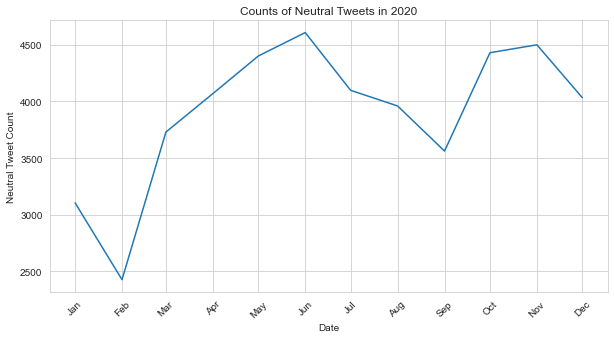

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(x, neu_tweets_by_month)
plt.title('Counts of Neutral Tweets in 2020')
plt.xlabel('Date')
plt.ylabel('Neutral Tweet Count')
plt.xticks(x, [dt.strftime('%b') for dt in x], rotation=45)
plt.show()

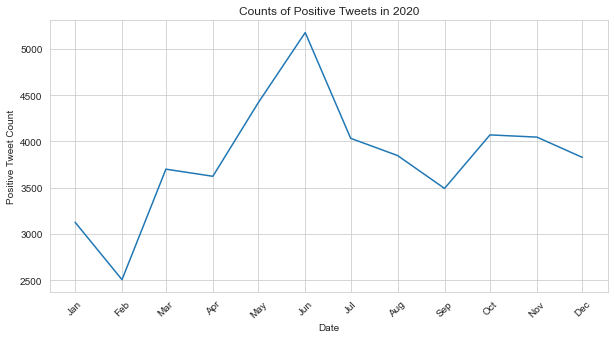

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(x, pos_tweets_by_month)
plt.title('Counts of Positive Tweets in 2020')
plt.xlabel('Date')
plt.ylabel('Positive Tweet Count')
plt.xticks(x, [dt.strftime('%b') for dt in x], rotation=45)
plt.show()

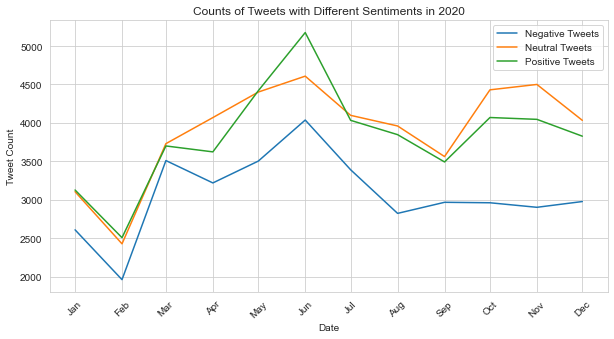

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(x, neg_tweets_by_month, label='Negative Tweets')
plt.plot(x, neu_tweets_by_month, label='Neutral Tweets')
plt.plot(x, pos_tweets_by_month, label='Positive Tweets')
plt.title('Counts of Tweets with Different Sentiments in 2020')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.xticks(x, [dt.strftime('%b') for dt in x], rotation=45)
plt.legend()
plt.show()

Example of computing a single day's sentiment compound score

In [ ]:
fig, axs = plt.subplots(nrows=11, ncols=3, figsize=(15, 35))
counter = 0
for key, df in dfs_3.items():
    # Extract negative sentiment scores into a list
    counter += 1
    negative_scores = df['Negative Scores'].tolist()
    # Create histogram on subplot
    axs[counter // 3, counter % 3].hist(negative_scores, bins=10)
    # Set subplot title
    axs[counter // 3, counter % 3].set_title(f"Negative Sentiment Scores for {key}")
    # Set x-axis label
    axs[counter // 3, counter % 3].set_xlabel('Negative Sentiment Score')
    # Set y-axis label
    axs[counter // 3, counter % 3].set_ylabel('Frequency')

fig.suptitle('Histograms of Negative Sentiment Scores for 31 Days')
fig.tight_layout()
plt.show()

## Time Series Analysis

- <b>tweets_ts: The monthly time series object of cleaned twitter dataset</b>
- <b>neg_tweets_ts: The monthly time series object of cleaned tweets classified as negative</b>

1. Obtain a time series object representing the number of Sinophobic tweets corresponding each month, use 01-01, 02-01, ..., 12-01 by convention

In [40]:
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2020-12-01')
date_range = pd.date_range(start_date, end_date, freq='MS')

In [41]:
month_tweet_ts = pd.Series(new_monthly_count_lst, index=date_range)
print(month_tweet_ts)

2020-01-01     8841
2020-02-01     6895
2020-03-01    10940
2020-04-01    10911
2020-05-01    12322
2020-06-01    13820
2020-07-01    11521
2020-08-01    10630
2020-09-01    10021
2020-10-01    11461
2020-11-01    11448
2020-12-01    11181
Freq: MS, dtype: int64


In [42]:
neg_month_tweets_ts = pd.Series(neg_tweets_by_month, index=date_range)
print(neg_month_tweets_ts)

2020-01-01    2609
2020-02-01    1961
2020-03-01    3510
2020-04-01    3219
2020-05-01    3503
2020-06-01    4037
2020-07-01    3390
2020-08-01    2823
2020-09-01    2967
2020-10-01    2961
2020-11-01    2902
2020-12-01    2977
Freq: MS, dtype: int64


In [43]:
start_day = pd.to_datetime('2020-01-01')
end_day = pd.to_datetime('2020-12-31')
day_range = pd.date_range(start_day, end_day, freq='D')
day_range

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [44]:
day_tweet_ts = pd.Series(all_tweet_counts, index=day_range)
print(day_tweet_ts)

2020-01-01    194
2020-01-02    297
2020-01-03    445
2020-01-04    356
2020-01-05    248
             ... 
2020-12-27    390
2020-12-28    359
2020-12-29    371
2020-12-30    344
2020-12-31    344
Freq: D, Length: 366, dtype: int64


2. Visualize the time series: Create a line plot to visualize the monthly Sinophobic tweet counts over time, which provides the overall trend and seasonality in the data.

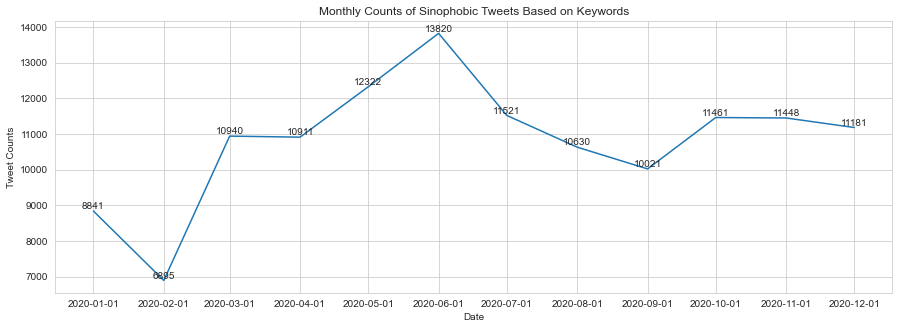

In [45]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(month_tweet_ts.index, month_tweet_ts.values)
plt.xlabel('Date')
plt.ylabel('Tweet Counts')
plt.title('Monthly Counts of Sinophobic Tweets Based on Keywords')
for date, value in month_tweet_ts.items():
    ax.text(date, value, value, ha='center', va='bottom')
ax.set_xticks(month_tweet_ts.index)
plt.show()

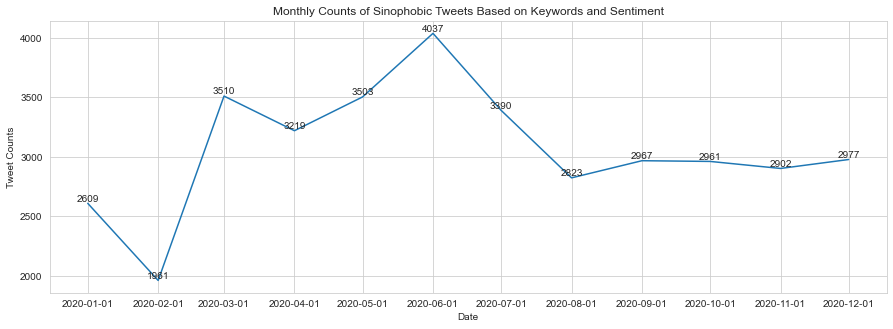

In [46]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(neg_month_tweets_ts.index, neg_month_tweets_ts.values)
plt.xlabel('Date')
plt.ylabel('Tweet Counts')
plt.title('Monthly Counts of Sinophobic Tweets Based on Keywords and Sentiment')
for date, value in neg_month_tweets_ts.items():
    ax.text(date, value, value, ha='center', va='bottom')
ax.set_xticks(neg_month_tweets_ts.index)
plt.show()

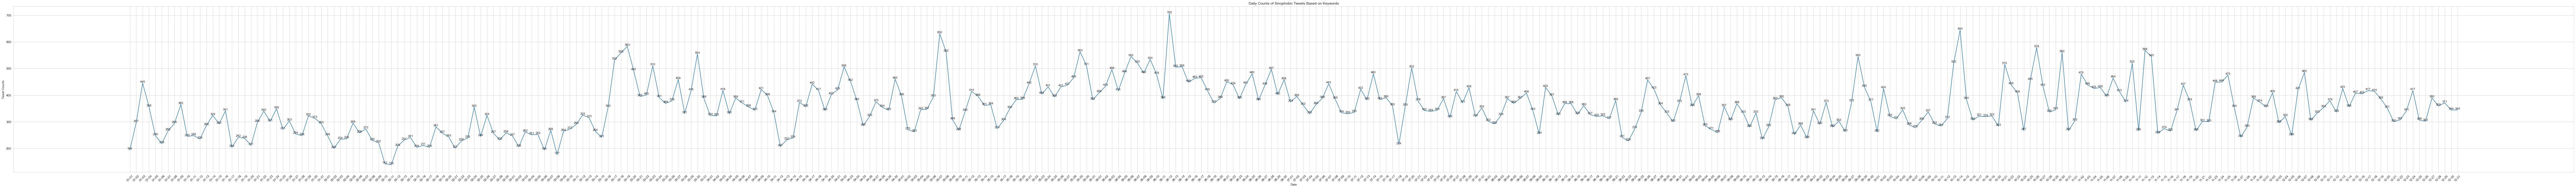

In [58]:
fig, ax = plt.subplots(figsize=(150, 10))
plt.plot(day_tweet_ts.index, day_tweet_ts.values)
plt.xlabel('Date')
plt.ylabel('Tweet Counts')
plt.title('Daily Counts of Sinophobic Tweets Based on Keywords')
for date, value in day_tweet_ts.items():
    ax.text(date, value, value, ha='center', va='bottom')
ax.set_xticks(day_tweet_ts.index)
ax.set_xticklabels([dt.strftime('%m-%d') for dt in day_tweet_ts.index], rotation=45)
plt.show()

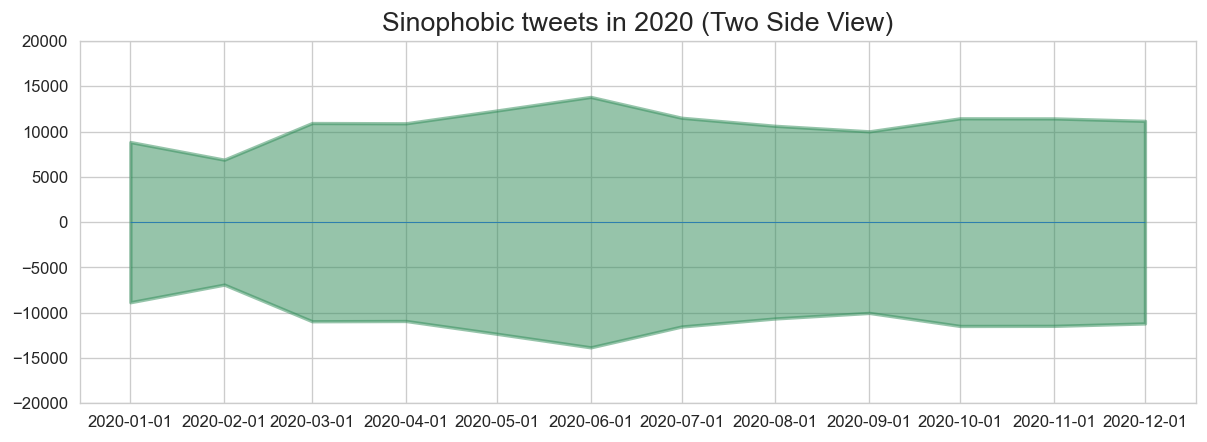

In [47]:
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(12,4), dpi= 120)
y1 = month_tweet_ts.values
x = month_tweet_ts.index
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-20000, 20000)
plt.xticks(x.strftime('%Y-%m'))
plt.title('Sinophobic tweets in 2020 (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(x), xmax=np.max(x), linewidth=.5)
plt.show()

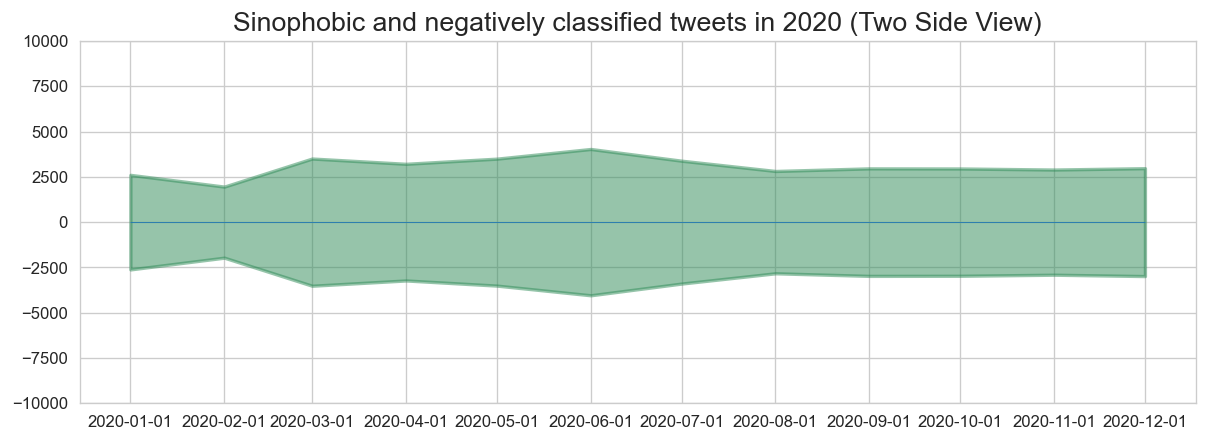

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(12,4), dpi= 120)
y1 = neg_month_tweets_ts.values
x = neg_month_tweets_ts.index
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-10000, 10000)
plt.xticks(x.strftime('%Y-%m'))
plt.title('Sinophobic and negatively classified tweets in 2020 (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(x), xmax=np.max(x), linewidth=.5)
plt.show()

3. Check for stationarity: Ensure the above time series object has consistent statistical properties overtime

<b>3.1 Augmented Dickey-Fuller Test</b>

- The most commonly used test to detect stationarity
- Null hypothesis: the time series is non-stationary, i.e., it has some time-dependent structure and does not have constant variance over time.
- If the p-value is less than some significance level (e.g. α = .05), then reject the null hypothesis and conclude that the time series is stationary.

In [49]:
from statsmodels.tsa.stattools import adfuller

In [50]:
result1 = adfuller(day_tweet_ts)

print('ADF Statistic:', result1[0])
print('p-value:', result1[1])

if result1[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: -2.4738793586957684
p-value: 0.12195979102599203
The time series is not stationary.


In [51]:
result2 = adfuller(month_tweet_ts)

print('ADF Statistic:', result2[0])
print('p-value:', result2[1])

if result2[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: -1.8229650102982937
p-value: 0.36912127240129383
The time series is not stationary.


In [52]:
result3 = adfuller(neg_month_tweets_ts)

print('ADF Statistic:', result3[0])
print('p-value:', result3[1])

if result3[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: -0.7608925463049765
p-value: 0.8303406197644827
The time series is not stationary.


<b>3.2 Kwiatkowski-Phillips-Schmidt-Shin – KPSS test </b>

- KPSS is used to test for trend stationarity
- Null hypothesis: the time series is stationary around a deterministic trend (i.e. trend-stationary) against the alternative of a unit root
- If the null hypothesis is not rejected, it indicates that the time series is stationary

In [53]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss

In [54]:
kpss_stat, p_value, lags_used, critical_values = kpss(day_tweet_ts)

print(f'KPSS Statistic: {kpss_stat}')
print(f'p-value: {p_value}')
print(f'Lags Used: {lags_used}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

KPSS Statistic: 0.7512567204059618
p-value: 0.01
Lags Used: 9
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [55]:
kpss_stat, p_value, lags_used, critical_values = kpss(month_tweet_ts)

print(f'KPSS Statistic: {kpss_stat}')
print(f'p-value: {p_value}')
print(f'Lags Used: {lags_used}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

KPSS Statistic: 0.23155892624087118
p-value: 0.1
Lags Used: 1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [56]:
kpss_stat, p_value, lags_used, critical_values = kpss(neg_month_tweets_ts)

print(f'KPSS Statistic: {kpss_stat}')
print(f'p-value: {p_value}')
print(f'Lags Used: {lags_used}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

KPSS Statistic: 0.1377569500353012
p-value: 0.1
Lags Used: 1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Conclusion:

(1) Both of the monthly tweet time series have non-significant p-values, so we cannot reject the null hypothesis at a 10% significance level. Both test statistics are less than all the critical values, so we cannot reject the null hypothesis of trend-stationarity.

(3) The daily tweet time series has significant p-value, which means this time series is not stationary

<b>3.3 Philips Perron test (PP Test)</b>

- PP test is built on the ADF test, while the ADF test addresses uses lags as regressors, the PP test makes a non-parametric correction to the t-test statistic
- Null hypothesis: a time series is integrated of order 1, i.e., there is a unit root
- If p-value is significant then we reject the null hypothesis of the time series being stationary, and conclude that the series is non-stationary

In [57]:
pp_test = sm.tsa.adfuller(day_tweet_ts.values, maxlag=30, autolag='AIC', regression='nc')
print('Phillips-Perron Statistic: %f' % pp_test[0])
print('p-value: %f' % pp_test[1])
print('Critical Values:')
for key, value in pp_test[4].items():
    print('\t%s: %.3f' % (key, value))

Phillips-Perron Statistic: -0.187952
p-value: 0.618356
Critical Values:
	1%: -2.572
	5%: -1.942
	10%: -1.616


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(


In [58]:
pp_test = sm.tsa.adfuller(month_tweet_ts.values, maxlag=4, autolag='AIC', regression='nc')
print('Phillips-Perron Statistic: %f' % pp_test[0])
print('p-value: %f' % pp_test[1])
print('Critical Values:')
for key, value in pp_test[4].items():
    print('\t%s: %.3f' % (key, value))

Phillips-Perron Statistic: 0.105345
p-value: 0.718206
Critical Values:
	1%: -2.799
	5%: -1.970
	10%: -1.596


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(


In [59]:
pp_test = sm.tsa.adfuller(neg_month_tweets_ts.values, maxlag=4, autolag='AIC', regression='nc')
print('Phillips-Perron Statistic: %f' % pp_test[0])
print('p-value: %f' % pp_test[1])
print('Critical Values:')
for key, value in pp_test[4].items():
    print('\t%s: %.3f' % (key, value))

Phillips-Perron Statistic: -5.866051
p-value: 0.000000
Critical Values:
	1%: -2.959
	5%: -1.957
	10%: -1.560


/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(


Conclusion:
The daily time series and the monthly time series are not stationary, but the monthly negative time series is stationary

4. Autocorrelation and Partial Autocorrelation Functions 

The ACF measures the correlation between a time series and its own lagged values at different lags. The ACF plot shows the correlation coefficients for each lag, with the correlation coefficients on the y-axis and the lags on the x-axis. A significant autocorrelation at a given lag suggests that the value at that lag is related to the value at the current time point.

The PACF, on the other hand, measures the correlation between a time series and its lagged values after accounting for the correlation with the intervening lags. In other words, it measures the direct effect of a specific lag on the current value, while controlling for the effects of the other lags. The PACF plot also shows the correlation coefficients for each lag, with the correlation coefficients on the y-axis and the lags on the x-axis.

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

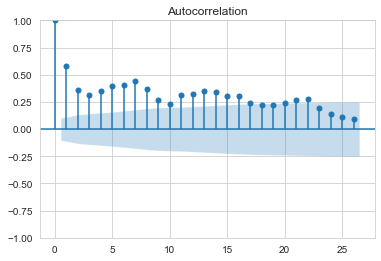

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


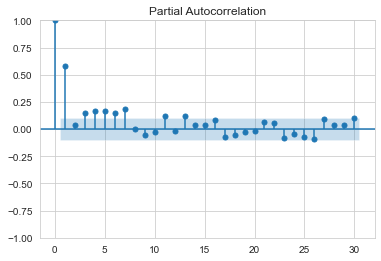

In [61]:
plot_acf(day_tweet_ts.values)
plt.show()

plot_pacf(day_tweet_ts, lags=30)
plt.show()

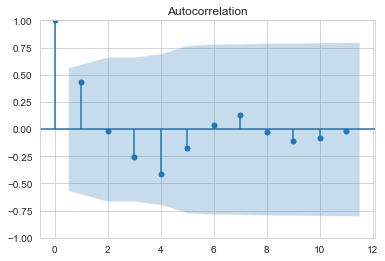

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


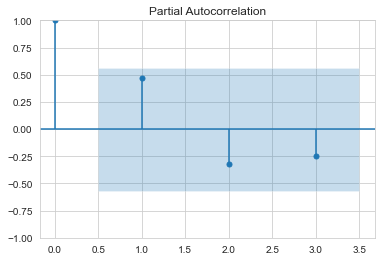

In [63]:
plot_acf(month_tweet_ts.values)
plt.show()

plot_pacf(month_tweet_ts, lags=3)
plt.show()

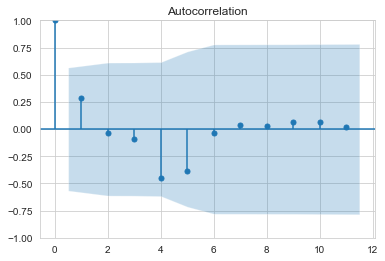

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


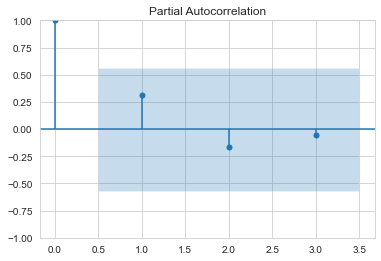

In [64]:
plot_acf(neg_month_tweets_ts.values)
plt.show()

plot_pacf(neg_month_tweets_ts, lags=3)
plt.show()

- In both time series ACF plots, only the first lags fall outside the blue shaded region and the rest are very small and approaching zero, indicating that there is only a weak autocorrelation between the observations in the time series. 

- This means there is little relationship between the current observation and previous observations. This can be a sign that the time series is random or noisy, and that there is no underlying pattern or trend that can be modeled. 

- The positive and negative signs on both time series ACF plots indicate that the autocorrelation alternates between positive and negative values, which is a sign of randomness.

In [65]:
month_tweet_diff = month_tweet_ts.diff().dropna()
month_neg_tweet_diff = neg_month_tweets_ts.diff().dropna()
day_tweet_diff = day_tweet_ts.diff().dropna()

In [66]:
result1 = adfuller(day_tweet_diff)

print('ADF Statistic:', result1[0])
print('p-value:', result1[1])

if result1[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: -8.507515124649213
p-value: 1.1917865939011757e-13
The time series is stationary.


In [67]:
result2 = adfuller(month_tweet_diff)

print('ADF Statistic:', result2[0])
print('p-value:', result2[1])

if result2[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: -4.089030729706263
p-value: 0.0010097591456692593
The time series is stationary.


In [68]:
result3 = adfuller(month_neg_tweet_diff)

print('ADF Statistic:', result3[0])
print('p-value:', result3[1])

if result3[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: -16.44643545340218
p-value: 2.400870180168758e-29
The time series is stationary.


4. Autoregressive Integrated Moving Average (ARIMA) 

4.1 Determine 3 parameters
- The order of autoregression (p) refers to the number of past values in the series that are used to predict the current value. 
- The order of moving average (q) refers to the number of past forecast errors that are used to predict the current value. 
- The order of integration (d) refers to the number of times the series is differenced to achieve stationarity.

In [ ]:
# plot_acf(ts_diff.tweet_counts)
# plt.show()
# plot_pacf(ts_diff, lags=4)
# plt.show()

5. Lag Plots

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

In [69]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

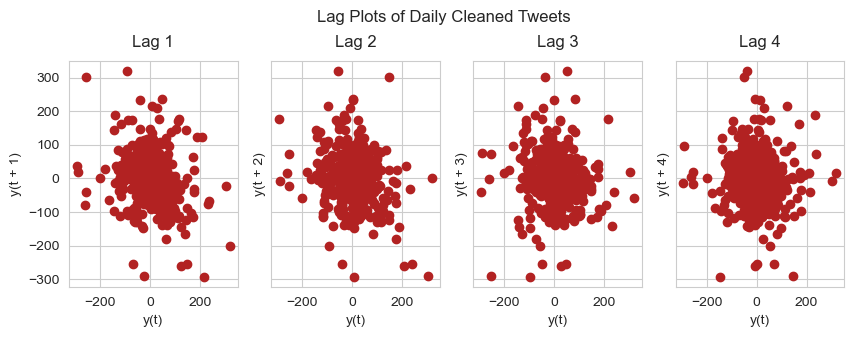

In [70]:
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(day_tweet_diff, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Daily Cleaned Tweets', y=1.05)    
plt.show()

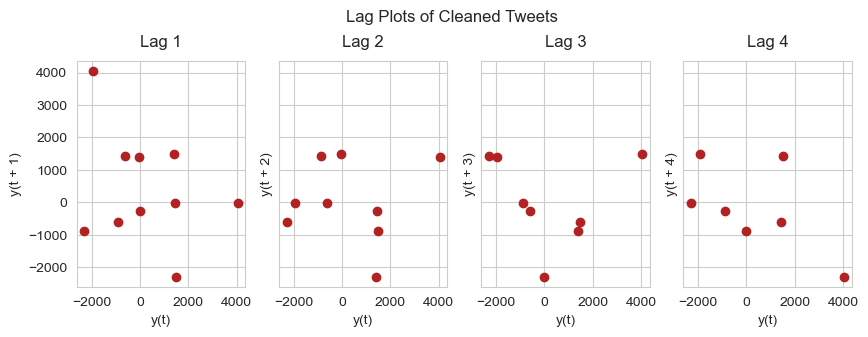

In [71]:
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(month_tweet_diff, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Cleaned Tweets', y=1.05)    
plt.show()

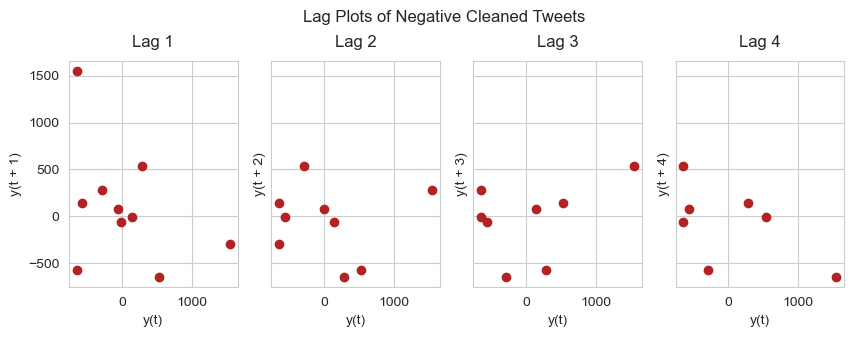

In [72]:
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(month_neg_tweet_diff, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Negative Cleaned Tweets', y=1.05)    
plt.show()

Since there does not seem to be patterns in the plots of different lag values, the series is likely to be random white noise

In [73]:
month_tweet_diff.to_csv('ts_month_tweet.csv')
day_tweet_diff.to_csv('ts_day_tweet.csv')

## Google Search Trends Analysis

1. Identify keywords
- Old set of search words: chink, chinaman, chinkland, gook
- New set of search words: Chinese virus, China virus, Wuhan virus, Kung flu

Note: The specific days included in Google Search Trends data are representative of overall search activity for the given time period. The specific days included in the sample are chosen based on a variety of factors, including the volume of searches for the given term and the overall distribution of search activity during the time period.

In [74]:
df1 = pd.read_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/old_search1.csv')
df2 = pd.read_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/old_search2.csv')

In [75]:
combined_old_df = pd.concat([df1, df2], ignore_index=True)
combined_old_df.set_index('Day', inplace=True)
combined_old_df.index = pd.to_datetime(combined_old_df.index)
combined_old_df

,chink + chinaman + chinkland + gook: (United States)
Day,
2020-01-01,59
2020-01-02,60
2020-01-03,42
2020-01-04,42
2020-01-05,36
...,...
2020-12-27,21
2020-12-28,48
2020-12-29,69


In [76]:
search_count = combined_old_df.values
search_count = search_count.flatten()
count_lst = search_count.tolist()

In [77]:
start_date = '2020-01-01'
end_date = '2020-12-31'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

In [78]:
old_day_google_ts = pd.Series(data=count_lst, index=date_range)
old_day_google_ts.values.dtype

dtype('int64')

In [79]:
old_day_google_ts = old_day_google_ts.astype('float')
old_day_google_ts

2020-01-01    59.0
2020-01-02    60.0
2020-01-03    42.0
2020-01-04    42.0
2020-01-05    36.0
              ... 
2020-12-27    21.0
2020-12-28    48.0
2020-12-29    69.0
2020-12-30    53.0
2020-12-31    51.0
Freq: D, Length: 366, dtype: float64

In [80]:
df3 = pd.read_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/new_search1.csv')
df4 = pd.read_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/new_search2.csv')
combined_new_df = pd.concat([df3, df4], ignore_index=True)
combined_new_df.set_index('Day', inplace=True)
combined_new_df.index = pd.to_datetime(combined_new_df.index)
combined_new_df

,Chinese virus + China virus + Wuhan virus + kung flu: (United States)
Day,
2020-01-01,0
2020-01-02,<1
2020-01-03,<1
2020-01-04,<1
2020-01-05,<1
...,...
2020-12-27,11
2020-12-28,9
2020-12-29,12


In [81]:
search_count1 = combined_new_df.values
search_count1 = search_count1.flatten()
new_day_google_ts = pd.Series(data=search_count1, index=date_range)
new_day_google_ts

2020-01-01     0
2020-01-02    <1
2020-01-03    <1
2020-01-04    <1
2020-01-05    <1
              ..
2020-12-27    11
2020-12-28     9
2020-12-29    12
2020-12-30    13
2020-12-31    10
Freq: D, Length: 366, dtype: object

In [82]:
new_day_google_ts = new_day_google_ts.replace('<1', '0.5')

In [83]:
new_day_google_ts = new_day_google_ts.astype('float')
new_day_google_ts

2020-01-01     0.0
2020-01-02     0.5
2020-01-03     0.5
2020-01-04     0.5
2020-01-05     0.5
              ... 
2020-12-27    11.0
2020-12-28     9.0
2020-12-29    12.0
2020-12-30    13.0
2020-12-31    10.0
Freq: D, Length: 366, dtype: float64

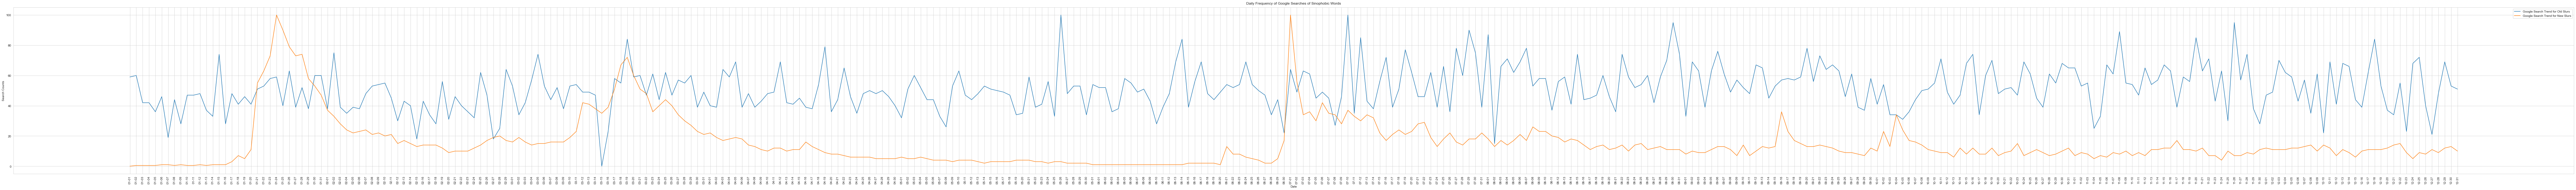

In [95]:
fig, ax = plt.subplots(figsize=(150, 10))

ax.plot(date_range, old_day_google_ts.values, label='Google Search Trend for Old Slurs')
ax.plot(date_range, new_day_google_ts.values, label='Google Search Trend for New Slurs')

plt.xlabel('Date')
plt.ylabel('Search Counts')
plt.title('Daily Frequency of Google Searches of Sinophobic Words')
ax.legend()

xticks = date_range.strftime('%m-%d')
plt.xticks(date_range, xticks, rotation=90)
plt.show()

In [84]:
old_month_google_ts = old_day_google_ts.resample('M').mean()
new_month_google_ts = new_day_google_ts.resample('M').mean()

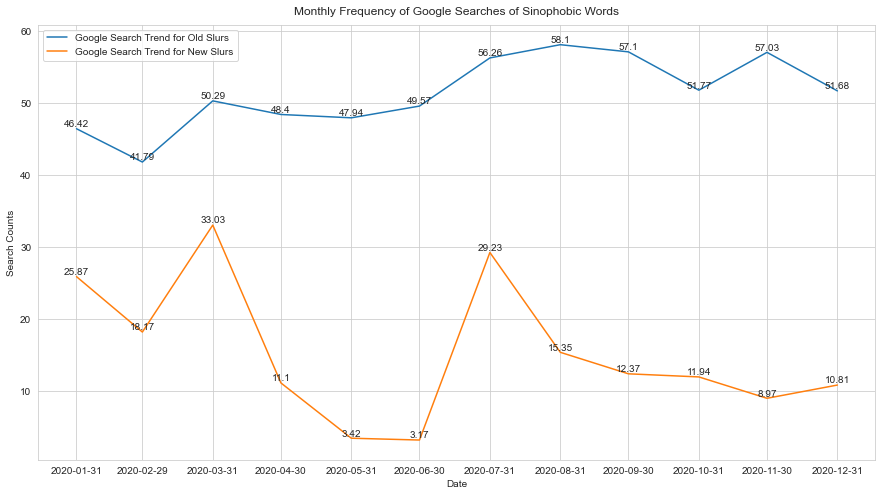

In [85]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(old_month_google_ts.index, old_month_google_ts.values, label='Google Search Trend for Old Slurs')
ax.plot(new_month_google_ts.index, new_month_google_ts.values, label='Google Search Trend for New Slurs')
plt.xlabel('Date')
plt.ylabel('Search Counts')
plt.title('Monthly Frequency of Google Searches of Sinophobic Words')
for date, value in old_month_google_ts.items():
    ax.text(date, round(value, 2), round(value, 2), ha='center', va='bottom')
for date, value in new_month_google_ts.items():
    ax.text(date, round(value, 2), round(value, 2), ha='center', va='bottom') 
plt.xticks(old_month_google_ts.index)
ax.legend()
plt.show()

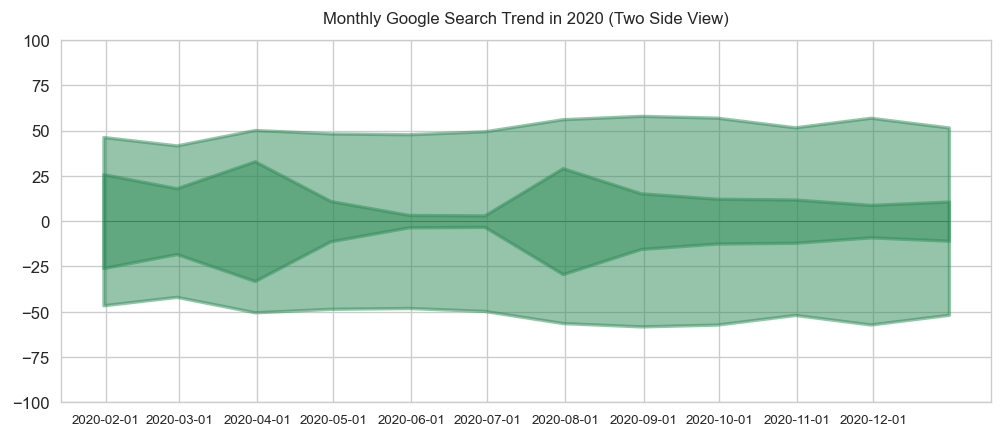

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(10,4), dpi= 120)
y1 = old_month_google_ts.values
y3 = new_month_google_ts.values

x = old_month_google_ts.index
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.fill_between(x, y1=y3, y2=-y3, alpha=0.5, linewidth=2, color='seagreen')

plt.ylim(-100, 100)
plt.xticks(x.strftime('%Y-%m'), fontsize=8)
plt.title('Monthly Google Search Trend in 2020 (Two Side View)', fontsize=10)
plt.hlines(y=0, xmin=np.min(x), xmax=np.max(x), linewidth=.5)
plt.show()

### Check for Google Search Trends Stationary

In [86]:
daily_result1 = adfuller(old_day_google_ts)

print('ADF Statistic:', daily_result1[0])
print('p-value:', daily_result1[1])

if daily_result1[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: -4.539631182877018
p-value: 0.00016663815363080885
The time series is stationary.


In [87]:
daily_result2 = adfuller(new_day_google_ts)

print('ADF Statistic:', daily_result2[0])
print('p-value:', daily_result2[1])

if daily_result2[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: -4.5600629075563806
p-value: 0.00015292717127540808
The time series is stationary.


In [88]:
monthly_result1 = adfuller(old_month_google_ts)

print('ADF Statistic:', monthly_result1[0])
print('p-value:', monthly_result1[1])

if monthly_result1[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: -3.269086710950715
p-value: 0.01631813046548839
The time series is stationary.


In [89]:
monthly_result2 = adfuller(new_month_google_ts)

print('ADF Statistic:', monthly_result2[0])
print('p-value:', monthly_result2[1])

if monthly_result2[1] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: -3.114240780696724
p-value: 0.025517100180110528
The time series is stationary.


All 4 Google search trends time series are stationary

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


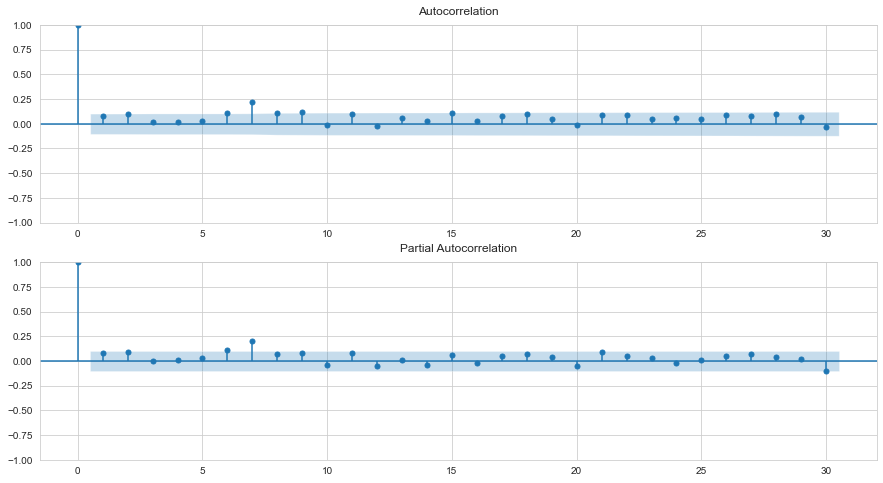

In [90]:
fig, ax = plt.subplots(2, 1, figsize=(15,8))
plot_acf(old_day_google_ts, ax=ax[0], lags=30)
plot_pacf(old_day_google_ts, ax=ax[1], lags=30)
plt.show()

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


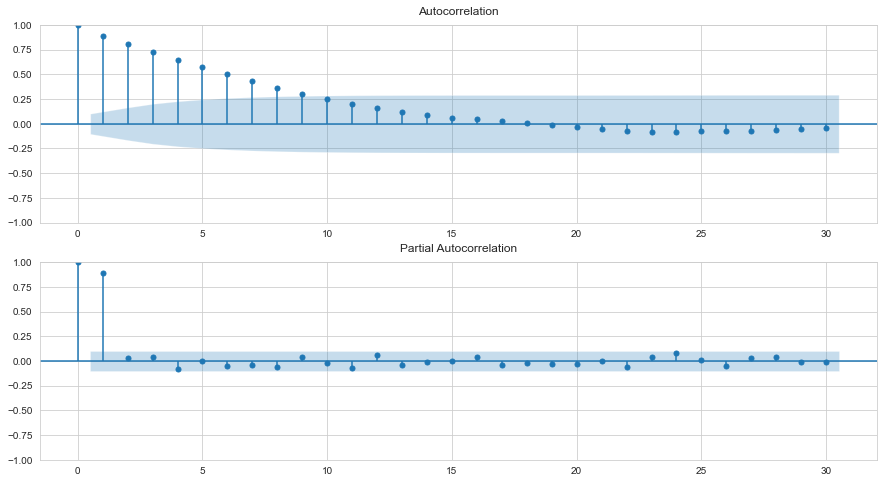

In [91]:
fig, ax = plt.subplots(2, 1, figsize=(15,8))
plot_acf(new_day_google_ts, ax=ax[0], lags=30)
plot_pacf(new_day_google_ts, ax=ax[1], lags=30)
plt.show()

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


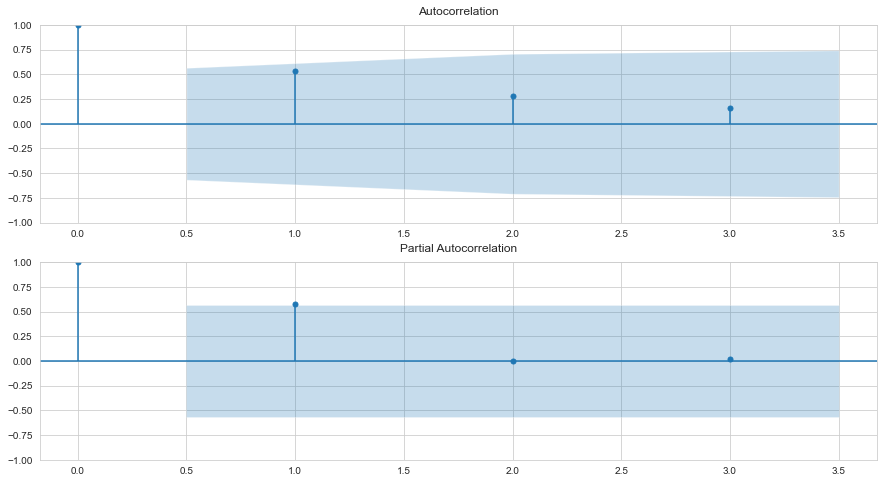

In [92]:
fig, ax = plt.subplots(2, 1, figsize=(15,8))
plot_acf(old_month_google_ts, ax=ax[0], lags=3)
plot_pacf(old_month_google_ts, ax=ax[1], lags=3)
plt.show()

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


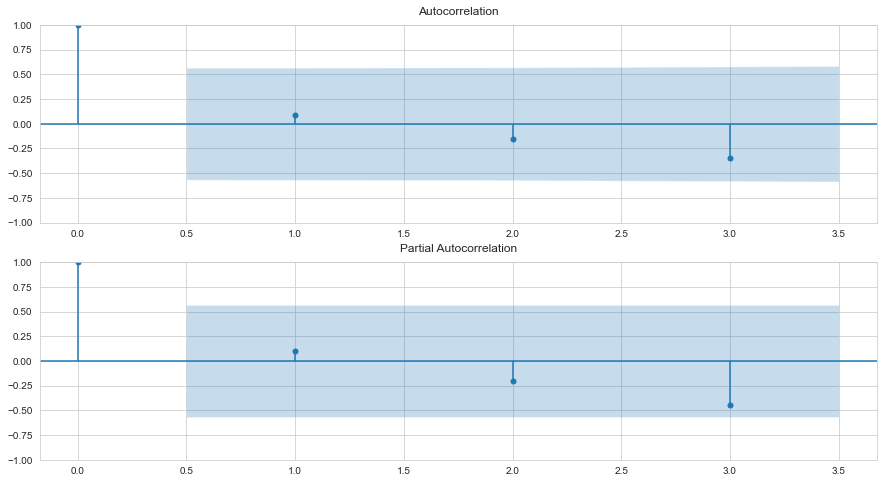

In [93]:
fig, ax = plt.subplots(2, 1, figsize=(15,8))
plot_acf(new_month_google_ts, ax=ax[0], lags=3)
plot_pacf(new_month_google_ts, ax=ax[1], lags=3)
plt.show()

From the above observation and process, d=1, q=5, p=3

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


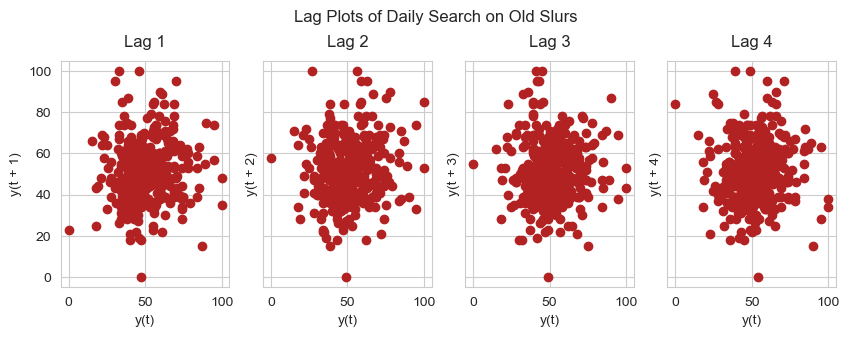

In [94]:
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(old_day_google_ts, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Daily Search on Old Slurs', y=1.05)    
plt.show()

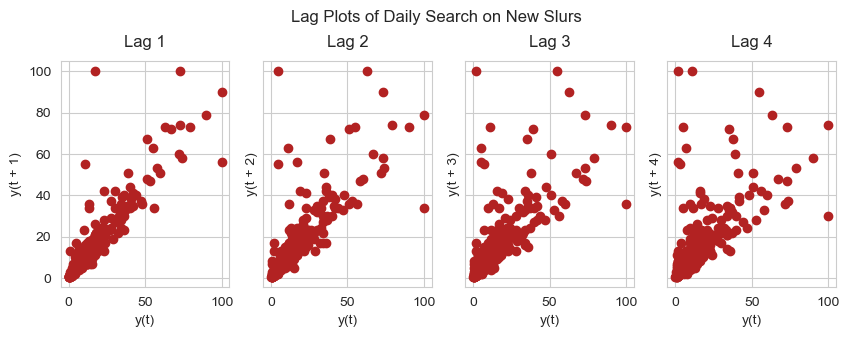

In [95]:
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(new_day_google_ts, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Daily Search on New Slurs', y=1.05)    
plt.show()

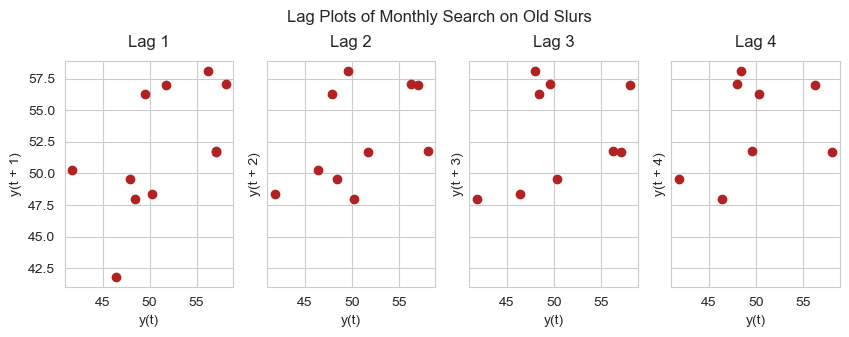

In [96]:
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(old_month_google_ts, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Monthly Search on Old Slurs', y=1.05)    
plt.show()

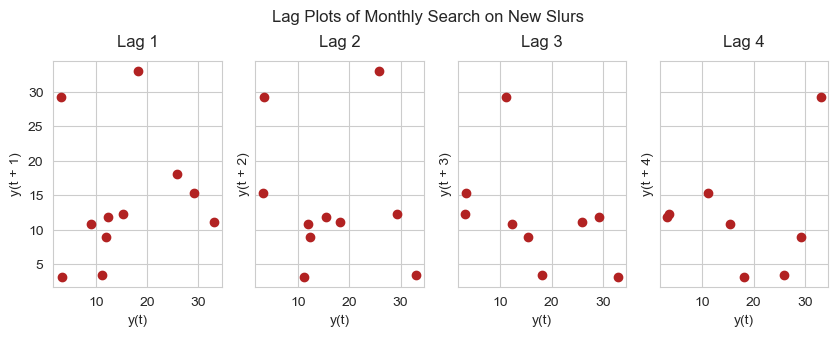

In [97]:
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(new_month_google_ts, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Monthly Search on New Slurs', y=1.05)    
plt.show()

In [103]:
from statsmodels.tsa.stattools import grangercausalitytests

In [104]:
def granger_table(res, lag_val):
    table = pd.DataFrame(columns=['Maxlags', 'ssr F p-value', 'ssr chi2 p-value', 
                                 'likelihoodratio p-value', 'param F p-value'])

    for lag in range(1, lag_val+1):
        test_results = res[lag][0]
        table = table.append({'Maxlags': lag, 
                                        'ssr F p-value': round(test_results['ssr_ftest'][1], 3),
                                        'ssr chi2 p-value': round(test_results['ssr_chi2test'][1], 3),
                                        'likelihoodratio p-value': round(test_results['lrtest'][1], 3),
                                        'param F p-value': round(test_results['params_ftest'][1], 3)},
                                        ignore_index=True)
    return table

In [107]:
granger_res1 = grangercausalitytests(np.column_stack((day_tweet_ts, old_day_google_ts)), maxlag=30)
table1 = granger_table(granger_res1, 30)
table1.set_index('Maxlags')


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6782  , p=0.4108  , df_denom=362, df_num=1
ssr based chi2 test:   chi2=0.6838  , p=0.4083  , df=1
likelihood ratio test: chi2=0.6831  , p=0.4085  , df=1
parameter F test:         F=0.6782  , p=0.4108  , df_denom=362, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6970  , p=0.4988  , df_denom=359, df_num=2
ssr based chi2 test:   chi2=1.4134  , p=0.4933  , df=2
likelihood ratio test: chi2=1.4107  , p=0.4939  , df=2
parameter F test:         F=0.6970  , p=0.4988  , df_denom=359, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7427  , p=0.5272  , df_denom=356, df_num=3
ssr based chi2 test:   chi2=2.2720  , p=0.5179  , df=3
likelihood ratio test: chi2=2.2649  , p=0.5193  , df=3
parameter F test:         F=0.7427  , p=0.5272  , df_denom=356, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3031  , p=0.2685  

/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_2324/1956729617.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_2324/1956729617.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_2324/1956729617.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_2324/1956729617.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({

,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
Maxlags,,,,
1.0,0.411,0.408,0.409,0.411
2.0,0.499,0.493,0.494,0.499
3.0,0.527,0.518,0.519,0.527
4.0,0.268,0.254,0.257,0.268
5.0,0.571,0.553,0.556,0.571
6.0,0.816,0.803,0.805,0.816
7.0,0.723,0.7,0.704,0.723
8.0,0.689,0.658,0.663,0.689
9.0,0.798,0.77,0.774,0.798


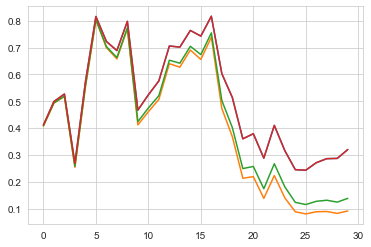

In [120]:
plt.plot(table1.index, table1['ssr F p-value'])
plt.plot(table1.index, table1['ssr chi2 p-value'])
plt.plot(table1.index, table1['likelihoodratio p-value'])
plt.plot(table1.index, table1['param F p-value'])

In [108]:
granger_res2 = grangercausalitytests(np.column_stack((day_tweet_ts, new_day_google_ts)), maxlag=30)
table2 = granger_table(granger_res2, 30)
table2.set_index('Maxlags')


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8880  , p=0.1703  , df_denom=362, df_num=1
ssr based chi2 test:   chi2=1.9036  , p=0.1677  , df=1
likelihood ratio test: chi2=1.8987  , p=0.1682  , df=1
parameter F test:         F=1.8880  , p=0.1703  , df_denom=362, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1007  , p=0.3338  , df_denom=359, df_num=2
ssr based chi2 test:   chi2=2.2320  , p=0.3276  , df=2
likelihood ratio test: chi2=2.2252  , p=0.3287  , df=2
parameter F test:         F=1.1007  , p=0.3338  , df_denom=359, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6467  , p=0.5855  , df_denom=356, df_num=3
ssr based chi2 test:   chi2=1.9782  , p=0.5769  , df=3
likelihood ratio test: chi2=1.9729  , p=0.5781  , df=3
parameter F test:         F=0.6467  , p=0.5855  , df_denom=356, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5489  , p=0.7000  

/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_2324/1956729617.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_2324/1956729617.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_2324/1956729617.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_2324/1956729617.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({

,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
Maxlags,,,,
1.0,0.17,0.168,0.168,0.17
2.0,0.334,0.328,0.329,0.334
3.0,0.585,0.577,0.578,0.585
4.0,0.7,0.69,0.691,0.7
5.0,0.784,0.772,0.774,0.784
6.0,0.869,0.859,0.86,0.869
7.0,0.918,0.909,0.91,0.918
8.0,0.728,0.7,0.704,0.728
9.0,0.841,0.818,0.822,0.841


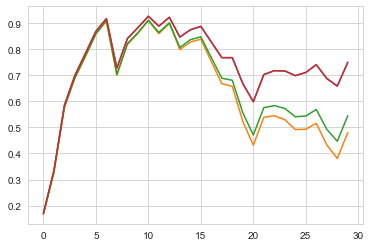

In [119]:
plt.plot(table2.index, table2['ssr F p-value'])
plt.plot(table2.index, table2['ssr chi2 p-value'])
plt.plot(table2.index, table2['likelihoodratio p-value'])
plt.plot(table2.index, table2['param F p-value'])

In [109]:
granger_res3 = grangercausalitytests(np.column_stack((old_day_google_ts, day_tweet_ts)), maxlag=30)
table3 = granger_table(granger_res3, 30)
table3.set_index('Maxlags')


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1132  , p=0.0785  , df_denom=362, df_num=1
ssr based chi2 test:   chi2=3.1390  , p=0.0764  , df=1
likelihood ratio test: chi2=3.1256  , p=0.0771  , df=1
parameter F test:         F=3.1132  , p=0.0785  , df_denom=362, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.5939  , p=0.0006  , df_denom=359, df_num=2
ssr based chi2 test:   chi2=15.3992 , p=0.0005  , df=2
likelihood ratio test: chi2=15.0824 , p=0.0005  , df=2
parameter F test:         F=7.5939  , p=0.0006  , df_denom=359, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.9075  , p=0.0024  , df_denom=356, df_num=3
ssr based chi2 test:   chi2=15.0119 , p=0.0018  , df=3
likelihood ratio test: chi2=14.7098 , p=0.0021  , df=3
parameter F test:         F=4.9075  , p=0.0024  , df_denom=356, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.6049  , p=0.0068  

/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_2324/1956729617.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_2324/1956729617.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_2324/1956729617.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_2324/1956729617.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({

,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
Maxlags,,,,
1.0,0.079,0.076,0.077,0.079
2.0,0.001,0.0,0.001,0.001
3.0,0.002,0.002,0.002,0.002
4.0,0.007,0.005,0.006,0.007
5.0,0.012,0.009,0.01,0.012
6.0,0.015,0.011,0.013,0.015
7.0,0.039,0.029,0.032,0.039
8.0,0.064,0.047,0.052,0.064
9.0,0.105,0.078,0.086,0.105


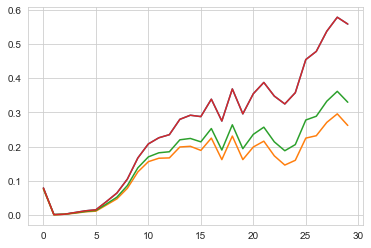

In [117]:
plt.plot(table3.index, table3['ssr F p-value'])
plt.plot(table3.index, table3['ssr chi2 p-value'])
plt.plot(table3.index, table3['likelihoodratio p-value'])
plt.plot(table3.index, table3['param F p-value'])

- Conclusion: 
1. At lag=1, the p value is not significant but close to the significant value 0.05
2. From lag=2 to lag=7, all 4 tests produce significant p-values, which means on daily basis, Google search trends based on the old set of keywords Granger-cause Sinophobic tweet trends.
3. After lag=8. we see gradual increase in p values as lag value increases. This might indicate that the causal relationship between the Google searsch trends on anti-Chinese terms and the Twitter trends on anti-Chinese sentiments weakens as the time lag between them increases. In other words, as the time lag between the variables increases, the influence of the first variable on the second variable becomes less and less significant. 

In [113]:
granger_res4 = grangercausalitytests(np.column_stack((new_day_google_ts, day_tweet_ts)), maxlag=30)
table4 = granger_table(granger_res4, 30)
table4.set_index('Maxlags')


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0138  , p=0.9066  , df_denom=362, df_num=1
ssr based chi2 test:   chi2=0.0139  , p=0.9062  , df=1
likelihood ratio test: chi2=0.0139  , p=0.9062  , df=1
parameter F test:         F=0.0138  , p=0.9066  , df_denom=362, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0641  , p=0.3461  , df_denom=359, df_num=2
ssr based chi2 test:   chi2=2.1578  , p=0.3400  , df=2
likelihood ratio test: chi2=2.1514  , p=0.3411  , df=2
parameter F test:         F=1.0641  , p=0.3461  , df_denom=359, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1570  , p=0.3261  , df_denom=356, df_num=3
ssr based chi2 test:   chi2=3.5394  , p=0.3157  , df=3
likelihood ratio test: chi2=3.5222  , p=0.3179  , df=3
parameter F test:         F=1.1570  , p=0.3261  , df_denom=356, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2130  , p=0.3049  

/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_2324/1956729617.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_2324/1956729617.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_2324/1956729617.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Maxlags': lag,
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_2324/1956729617.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({

,ssr F p-value,ssr chi2 p-value,likelihoodratio p-value,param F p-value
Maxlags,,,,
1.0,0.907,0.906,0.906,0.907
2.0,0.346,0.34,0.341,0.346
3.0,0.326,0.316,0.318,0.326
4.0,0.305,0.29,0.293,0.305
5.0,0.404,0.384,0.388,0.404
6.0,0.436,0.409,0.415,0.436
7.0,0.517,0.486,0.492,0.517
8.0,0.503,0.463,0.472,0.503
9.0,0.531,0.485,0.495,0.531


- Conclusion: Only at lag=20 we see a clear Granger Causality between the Google search trends and Twitter trends. Interestingly, as lag increases, we see fluctuations between p-values.

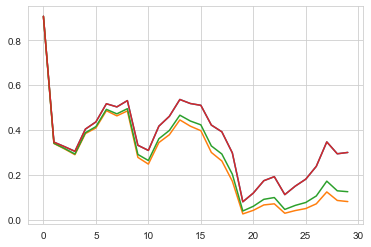

In [116]:
plt.plot(table4.index, table4['ssr F p-value'])
plt.plot(table4.index, table4['ssr chi2 p-value'])
plt.plot(table4.index, table4['likelihoodratio p-value'])
plt.plot(table4.index, table4['param F p-value'])

In [102]:
old_day_google_ts.to_csv('ts_d_google_old.csv')
new_day_google_ts.to_csv('ts_d_google_new.csv')
old_month_google_ts.to_csv('ts_m_google_old.csv')
new_month_google_ts.to_csv('ts_m_google_new.csv')